# The Brinson-Fachler Model #

In [573]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data
from portfolios_toolkit import markowitz_weights

### Building a Portfolio ###

In [444]:
# Import the Returns Data
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [445]:
# Make the portfolio DataFrame
portfolio_holdings_df = returns_df[['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA']]
portfolio_holdings_df = portfolio_holdings_df

portfolio_holdings_df

,AAPL,AMZN,META,MSFT,NVDA
Date,,,,,
2015-01-05,-0.028576,-0.020731,-0.016191,-0.009238,-0.017035
2015-01-06,0.000094,-0.023098,-0.013565,-0.014786,-0.030788
2015-01-07,0.013925,0.010544,0.000000,0.012625,-0.002609
2015-01-08,0.037702,0.006813,0.026309,0.028994,0.036927
2015-01-09,0.001072,-0.011818,-0.005644,-0.008441,0.004020
...,...,...,...,...,...
2024-12-24,0.011413,0.017573,0.013084,0.009330,0.003930
2024-12-26,0.003171,-0.008770,-0.007266,-0.002781,-0.002070
2024-12-27,-0.013331,-0.014641,-0.005884,-0.017453,-0.021088


In [446]:
# Portfolio's Expected Returns
expected_returns = portfolio_holdings_df.mean()

expected_returns

AAPL    0.000927
AMZN    0.001056
META    0.000801
MSFT    0.000935
NVDA    0.002238
dtype: float64

In [447]:
# Covariance Matrix
covariance_matrix = portfolio_holdings_df.cov()

covariance_matrix

,AAPL,AMZN,META,MSFT,NVDA
AAPL,0.000322,0.000205,0.000224,0.000210,0.000298
AMZN,0.000205,0.000423,0.000290,0.000232,0.000324
META,0.000224,0.000290,0.000569,0.000237,0.000349
MSFT,0.000210,0.000232,0.000237,0.000292,0.000316
NVDA,0.000298,0.000324,0.000349,0.000316,0.000923


In [555]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0015
)

In [556]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = portfolio_holdings_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL    0.265401
AMZN    0.237189
META   -0.138590
MSFT    0.236767
NVDA    0.399233
Name: weights, dtype: float64

In [557]:
# Portfolio Returns
portfolio_returns = portfolio_holdings_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

portfolio_returns

Date
2015-01-05   -0.019245
2015-01-06   -0.019366
2015-01-07    0.008144
2015-01-08    0.029583
2015-01-09   -0.002130
                ...   
2024-12-24    0.009162
2024-12-26   -0.001717
2024-12-27   -0.018747
2024-12-30   -0.005920
2024-12-31   -0.013851
Name: portfolio_returns, Length: 2515, dtype: float64

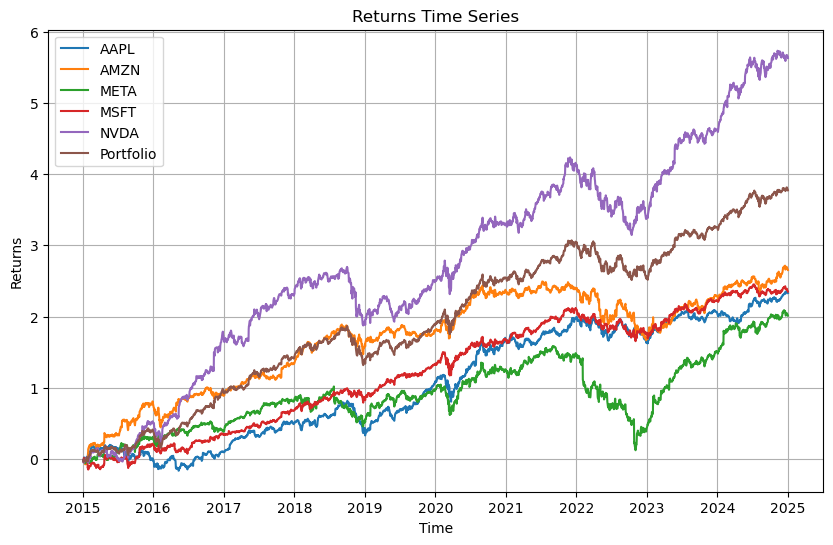

In [558]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(portfolio_holdings_df.cumsum(), label=portfolio_holdings_df.columns, alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

### Obtaining a Benchmark: Using a Hypothetical Portfolio ###

In [679]:
# Get the returns of each stock of our portfolio but in the IWY
iwy_weights = pd.Series(
    [9.65, 6.66, 4.34, 11.28, 10.47],
    index = portfolio_holdings_df.columns,
    name = 'weights'
)

iwy_weights = iwy_weights/100

# Normalized
norm_iwy_weights = iwy_weights/iwy_weights.sum()

norm_iwy_weights

AAPL    0.227594
AMZN    0.157075
META    0.102358
MSFT    0.266038
NVDA    0.246934
Name: weights, dtype: float64

In [680]:
# Build the Benchmark Returns
benchmark_returns = portfolio_holdings_df @ norm_iwy_weights
benchmark_returns.name = 'benchmark_returns'

benchmark_returns

Date
2015-01-05   -0.018082
2015-01-06   -0.016531
2015-01-07    0.007540
2015-01-08    0.029176
2015-01-09   -0.003443
                ...   
2024-12-24    0.010150
2024-12-26   -0.002651
2024-12-27   -0.015787
2024-12-30   -0.008923
2024-12-31   -0.011879
Name: benchmark_returns, Length: 2515, dtype: float64

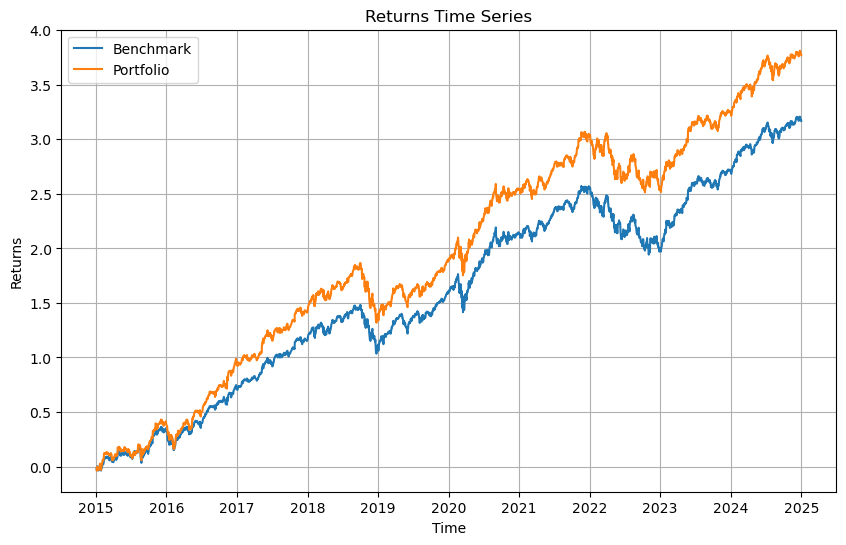

In [681]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [682]:
# Calculate the Mean Returns
portfolio_mean_returns = portfolio_returns.mean()
benchmark_mean_returns = benchmark_returns.mean()

print(portfolio_mean_returns)
print(benchmark_mean_returns)

0.0015000000000000002
0.0012599179041126202


In [683]:
# Calculate the Excess Returns
excess_returns = portfolio_mean_returns - benchmark_mean_returns

excess_returns

0.00024008209588738004

In [736]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = (portfolio_weights - norm_iwy_weights) * benchmark_mean_returns
allocation_effect.name = 'allocation_effect'

allocation_effect

AAPL    0.000048
AMZN    0.000101
META   -0.000304
MSFT   -0.000037
NVDA    0.000192
Name: allocation_effect, dtype: float64

In [737]:
# Calculate the Brinson-Fachler Selection Effect
selection_effect = norm_iwy_weights * (expected_returns - benchmark_mean_returns)
selection_effect.name = 'selection_effect'

selection_effect

AAPL   -0.000076
AMZN   -0.000032
META   -0.000047
MSFT   -0.000086
NVDA    0.000241
Name: selection_effect, dtype: float64

In [738]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = (portfolio_weights - norm_iwy_weights) * (expected_returns - benchmark_mean_returns)
interaction_effect.name = 'interaction_effect'

interaction_effect

AAPL   -0.000013
AMZN   -0.000016
META    0.000111
MSFT    0.000010
NVDA    0.000149
Name: interaction_effect, dtype: float64

In [739]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

AAPL   -0.000041
AMZN    0.000052
META   -0.000240
MSFT   -0.000114
NVDA    0.000582
Name: bf_total_attribution, dtype: float64

In [740]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
AAPL,0.000048,-0.000076,-0.000013,-0.000041
AMZN,0.000101,-0.000032,-0.000016,0.000052
META,-0.000304,-0.000047,0.000111,-0.000240
MSFT,-0.000037,-0.000086,0.000010,-0.000114
NVDA,0.000192,0.000241,0.000149,0.000582


In [741]:
brinson_fachler_df.sum().round(6)

allocation     0.00000
selection      0.00000
interaction    0.00024
total          0.00024
dtype: float64

In [742]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
AAPL,19.840546,-31.585812,-5.246887,-16.992154
AMZN,42.042346,-13.368622,-6.818404,21.855320
META,-126.446329,-19.577402,46.084507,-99.939224
MSFT,-15.361068,-36.021690,3.963326,-47.419433
NVDA,79.924505,100.553527,62.017458,242.495490


In [743]:
norm_brinson_fachler_df.sum().round(2)

allocation       0.0
selection        0.0
interaction    100.0
total          100.0
dtype: float64

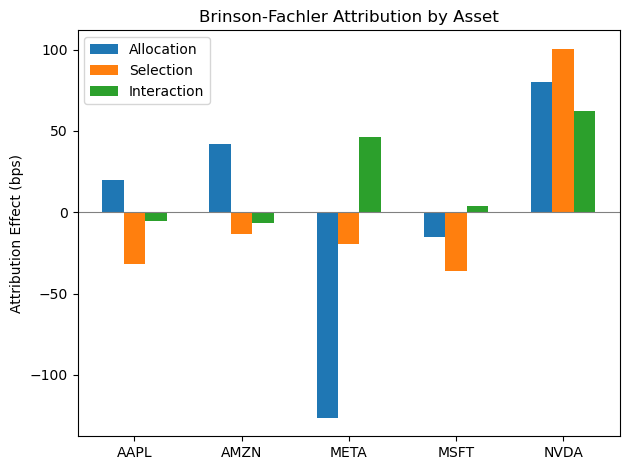

In [744]:
# Plotting individual attribution effects per asset
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(norm_brinson_fachler_df))

# Plot each component
ax.bar(x - bar_width, norm_brinson_fachler_df["allocation"], width=bar_width, label="Allocation")
ax.bar(x, norm_brinson_fachler_df["selection"], width=bar_width, label="Selection")
ax.bar(x + bar_width, norm_brinson_fachler_df["interaction"], width=bar_width, label="Interaction")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(norm_brinson_fachler_df.index)
ax.set_ylabel("Attribution Effect (bps)")
ax.set_title("Brinson-Fachler Attribution by Asset")
ax.legend()
ax.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()

### Using a Real ETF as Benchmark ###

In [745]:
# Download Benchmark Data
real_benchmark_data = import_daily_financial_data(
        ticker='IWY', 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )

# Returns
real_benchmark_data = real_benchmark_data['returns']

real_benchmark_data

[*********************100%***********************]  1 of 1 completed


Date
2015-01-05   -0.016821
2015-01-06   -0.009332
2015-01-07    0.012760
2015-01-08    0.018345
2015-01-09   -0.007537
                ...   
2024-12-24    0.013657
2024-12-26   -0.001805
2024-12-27   -0.014681
2024-12-30   -0.012155
2024-12-31   -0.007917
Name: returns, Length: 2515, dtype: float64

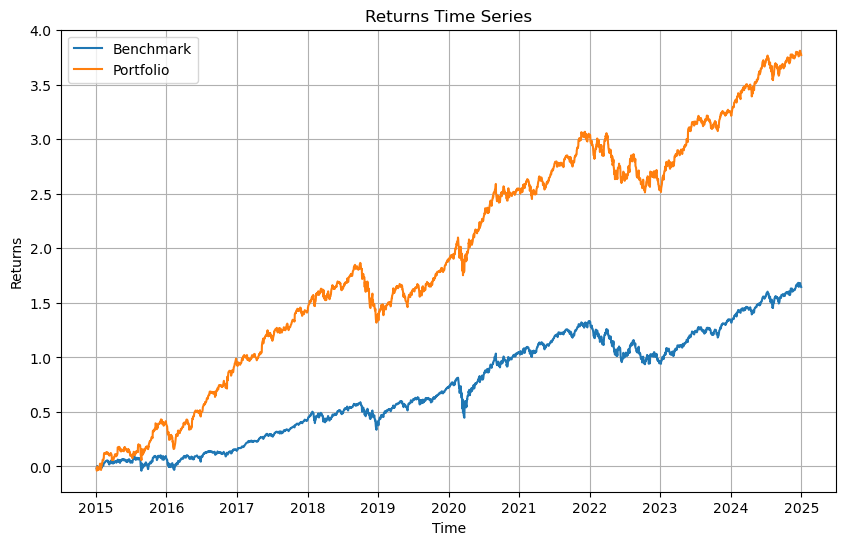

In [746]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(real_benchmark_data.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [747]:
# Calculate the Mean Returns
portfolio_mean_returns = portfolio_returns.mean()
real_benchmark_mean_returns = real_benchmark_data.mean()
real_excess_returns = portfolio_mean_returns - real_benchmark_mean_returns

print(portfolio_mean_returns)
print(real_benchmark_mean_returns)
print(real_excess_returns)

0.0015000000000000002
0.0006544385957966103
0.0008455614042033899


In [748]:
# Calculate the Brinson-Fachler Allocation Effect
real_allocation_effect = (portfolio_weights - iwy_weights) * real_benchmark_mean_returns
real_allocation_effect.name = 'allocation_effect'

real_allocation_effect

AAPL    0.000111
AMZN    0.000112
META   -0.000119
MSFT    0.000081
NVDA    0.000193
Name: allocation_effect, dtype: float64

In [749]:
# Calculate the Brinson-Fachler Selection Effect
real_selection_effect = iwy_weights * (expected_returns - real_benchmark_mean_returns)
real_selection_effect.name = 'selection_effect'

real_selection_effect

AAPL    0.000026
AMZN    0.000027
META    0.000006
MSFT    0.000032
NVDA    0.000166
Name: selection_effect, dtype: float64

In [750]:
# Calculate the Brinson-Fachler Intersection Effect
real_interaction_effect = (portfolio_weights - iwy_weights) * (expected_returns - real_benchmark_mean_returns)
real_interaction_effect.name = 'interaction_effect'

real_interaction_effect

AAPL    0.000046
AMZN    0.000068
META   -0.000027
MSFT    0.000035
NVDA    0.000466
Name: interaction_effect, dtype: float64

In [751]:
# Calculate the Total Effect
real_total_attribution = (
        real_allocation_effect + 
        real_selection_effect +
        real_interaction_effect
)

real_total_attribution.name = 'bf_total_attribution'

real_total_attribution

AAPL    0.000183
AMZN    0.000207
META   -0.000139
MSFT    0.000148
NVDA    0.000825
Name: bf_total_attribution, dtype: float64

In [752]:
# Show
real_brinson_fachler_df = pd.DataFrame({
    'allocation': real_allocation_effect,
    'selection': real_selection_effect,
    'interaction': real_interaction_effect,
    'total': real_total_attribution
})

real_brinson_fachler_df

,allocation,selection,interaction,total
AAPL,0.000111,0.000026,0.000046,0.000183
AMZN,0.000112,0.000027,0.000068,0.000207
META,-0.000119,0.000006,-0.000027,-0.000139
MSFT,0.000081,0.000032,0.000035,0.000148
NVDA,0.000193,0.000166,0.000466,0.000825


In [753]:
# Normalize
real_brinson_fachler_df_norm = (real_brinson_fachler_df / real_brinson_fachler_df['total'].sum()) * 100

real_brinson_fachler_df_norm

,allocation,selection,interaction,total
AAPL,9.041625,2.149337,3.761925,14.952887
AMZN,9.131960,2.185355,5.597552,16.914867
META,-9.742279,0.519340,-2.177754,-11.400693
MSFT,6.636185,2.587271,2.843398,12.066854
NVDA,15.766952,13.558242,38.140890,67.466085


In [754]:
real_brinson_fachler_df_norm.sum()

allocation      30.834443
selection       20.999545
interaction     48.166011
total          100.000000
dtype: float64

<Axes: >

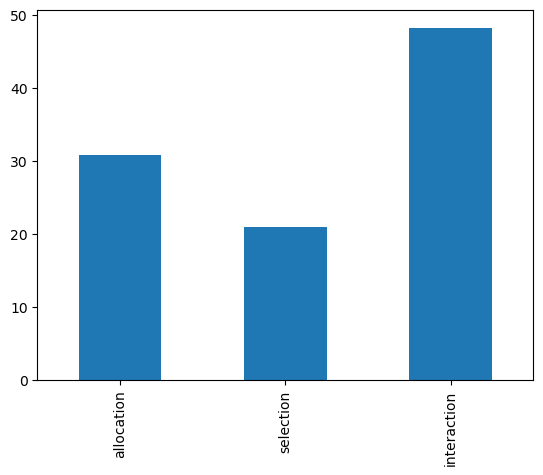

In [755]:
real_brinson_fachler_df_norm.sum().drop('total').plot(kind='bar')